# 0808

Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

### 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random as python_random

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

df = pd.read_csv("/content/drive/MyDrive/m6_dl/data/wine.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(5197, 12)

In [ ]:
y_train.shape

(5197,)

In [3]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=30)
# 154 * 30 = 4620
loss, acc = model.evaluate(X_test, y_test)

print("손실값:", loss)
print("정확도:", acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5065 - loss: 6.2929
Epoch 2/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.2197
Epoch 3/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.1982
Epoch 4/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.1866
Epoch 5/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.1789
Epoch 6/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9421 - loss: 0.1689
Epoch 7/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9449 - loss: 0.1587
Epoch 8/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1455
Epoch 9/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1236
Epoch 10/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.1137
Epoch 11/100
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1062
Epoch 12/100
174/174 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=50)
loss, acc = model.evaluate(X_test, y_test)

print("손실값:", loss)
print("정확도:", acc)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8877 - loss: 0.3398
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.1816
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.1662
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1552
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1449
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.1342
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9554 - loss: 0.1265
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.1192
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1128
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1072
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.1018
Epoch 12/100
104/104 ━━━━━━━━━━━━━━━━━━━

batch_size 50

손실값: 0.049001824110746384

정확도: 0.9784615635871887

In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(30, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0)

loss, acc = model.evaluate(X_test, y_test)

print("손실값:", loss)
print("정확도:", acc)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9336 - loss: 0.1933
손실값: 0.18517252802848816
정확도: 0.936923086643219


In [ ]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(30, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=1)

loss, acc = model.evaluate(X_test, y_test)

print("손실값:", loss)
print("정확도:", acc)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.7510 - loss: 8.0849 - val_accuracy: 0.7654 - val_loss: 5.6416
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7510 - loss: 5.5895 - val_accuracy: 0.7654 - val_loss: 3.8404
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7510 - loss: 3.7340 - val_accuracy: 0.7654 - val_loss: 2.3614
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7510 - loss: 2.2146 - val_accuracy: 0.7677 - val_loss: 1.1881
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7556 - loss: 1.0959 - val_accuracy: 0.7969 - val_loss: 0.6224
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7966 - loss: 0.5838 - val_accuracy: 0.8269 - val_loss: 0.3710
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8045 - loss: 0.4251 - val_accuracy: 0.8408 - val_loss: 0.3466
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8461 - loss: 0.3574 - val_accuracy: 0.8615 - val_loss: 0.3141
Epoch 

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)

.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [ ]:
from re import VERBOSE
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "/content/drive/MyDrive/dataset/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks= [checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/dataset/model/all/01-0.9346.keras

Epoch 2: saving model to /content/drive/MyDrive/dataset/model/all/02-0.9369.keras

Epoch 3: saving model to /content/drive/MyDrive/dataset/model/all/03-0.9369.keras

Epoch 4: saving model to /content/drive/MyDrive/dataset/model/all/04-0.9369.keras

Epoch 5: saving model to /content/drive/MyDrive/dataset/model/all/05-0.9369.keras

Epoch 6: saving model to /content/drive/MyDrive/dataset/model/all/06-0.9369.keras

Epoch 7: saving model to /content/drive/MyDrive/dataset/model/all/07-0.9377.keras

Epoch 8: saving model to /content/drive/MyDrive/dataset/model/all/08-0.9369.keras

Epoch 9: saving model to /content/drive/MyDrive/dataset/model/all/09-0.9369.keras

Epoch 10: saving model to /content/drive/MyDrive/dataset/model/all/10-0.9369.keras

Epoch 11: saving model to /content/drive/MyDrive/dataset/model/all/11-0.9369.keras

Epoch 12: saving model to /content/drive/MyDrive/dataset/model/all/12-0.9369.keras



In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1312
[0.1219036653637886, 0.9492307901382446]


### 그래프로 과적합 확인하기

History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [4]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, verbose=0, validation_split=0.25)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history['loss'])

[0.04610130190849304, 0.04761020466685295, 0.05142218619585037, 0.05430837720632553, 0.05517594516277313, 0.05538017675280571, 0.051511574536561966, 0.04662809893488884, 0.04490913823246956, 0.044386811554431915, 0.04547685757279396, 0.047322824597358704, 0.05039699748158455, 0.05136427655816078, 0.0512133426964283, 0.04796275123953819, 0.04522905871272087, 0.044426921755075455, 0.044204309582710266, 0.04473887383937836, 0.046361953020095825, 0.0478767566382885, 0.04957050830125809, 0.04858534783124924, 0.04698188975453377, 0.045993827283382416, 0.045787010341882706, 0.04579821601510048, 0.04619580879807472, 0.045993685722351074, 0.04612339660525322, 0.0459902361035347, 0.04559887573122978, 0.04503681883215904, 0.0447549931704998, 0.04465976729989052, 0.04459002614021301, 0.04465224966406822, 0.04465271532535553, 0.044675830751657486, 0.04459059610962868, 0.04464264586567879, 0.04451150819659233, 0.04436134174466133, 0.044303230941295624, 0.044160690158605576, 0.04407600685954094, 0.04

In [ ]:
print(history.history['val_accuracy'])

[0.986923098564148, 0.986923098564148, 0.9876922965049744, 0.986923098564148, 0.9861538410186768, 0.986923098564148, 0.986923098564148, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.9876922965049744, 0.9876922965049744, 0.9876922965049744, 0.9884615540504456, 0.986923098564148, 0.9861538410186768, 0.986923098564148, 0.9876922965049744, 0.9876922965049744, 0.9876922965049744, 0.986923098564148, 0.986923098564148, 0.9876922965049744, 0.9876922965049744, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.986923098564148, 0.9876922965049744, 0.986923098564148, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9884615540504456, 0.9876922965049744, 0.9

In [5]:
hist_df = pd.DataFrame(history.history)
hist_df


,accuracy,loss,val_accuracy,val_loss
0,0.986656,0.042414,0.985385,0.044169
1,0.986913,0.041362,0.986923,0.041915
2,0.987426,0.039566,0.988462,0.040855
3,0.988196,0.038400,0.989231,0.041104
4,0.987683,0.038148,0.989231,0.040830
...,...,...,...,...
995,0.994355,0.022385,0.985385,0.053798
996,0.994355,0.022270,0.985385,0.053586
997,0.994098,0.021984,0.986923,0.053391
998,0.994098,0.021857,0.985385,0.054444


In [6]:
hist_df.shape

(1000, 4)

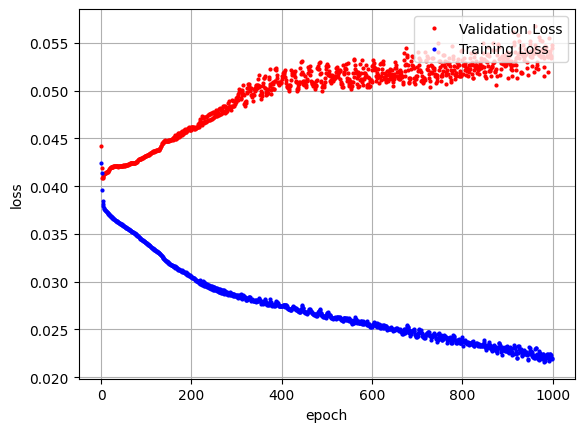

In [7]:
import matplotlib.pyplot as plt

#테스트셋의 오차를 저장합니다.
y_vloss = hist_df["val_loss"]
#학습셋의
y_loss = hist_df["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red",markersize=2, label="Validation Loss")
plt.plot(x_len, y_loss, "o", c="blue",markersize=2, label="Training Loss")
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

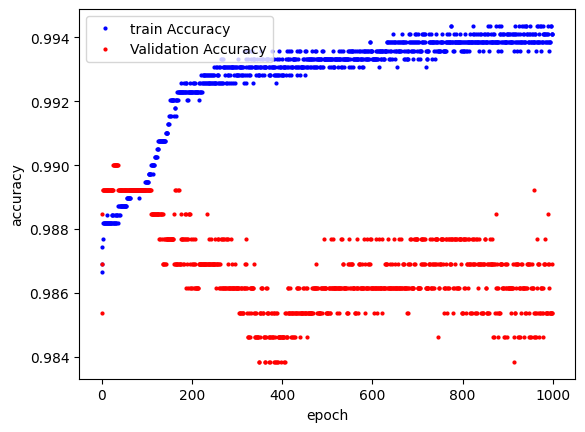

In [9]:
y_acc = history.history["accuracy"]
y_vacc = history.history["val_accuracy"]

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, "o", c="blue", markersize=2, label="train Accuracy")
plt.plot(x_len, y_vacc, "o", c="red", markersize=2, label="Validation Accuracy")

plt.legend(loc="upper left")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


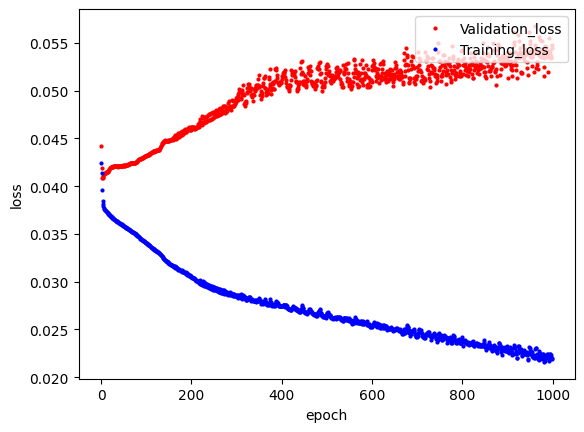

In [10]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장
y_loss=hist_df['loss']

# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Validation_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Training_loss')


plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random
import numpy as np
import tensorflow as tf

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/m6_dl/dataset/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor="val_loss", patience=30)

modelpath = "/content/drive/MyDrive/m6_dl/data/model/bestmodel.keras"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=300, batch_size=500, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.2473 - loss: 20.9778 - val_accuracy: 0.2115 - val_loss: 14.9281
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2111 - loss: 12.6846 - val_accuracy: 0.1546 - val_loss: 8.0601
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1401 - loss: 6.4213 - val_accuracy: 0.1331 - val_loss: 2.5203
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3309 - loss: 1.7091 - val_accuracy: 0.7615 - val_loss: 0.7878
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7474 - loss: 0.8786 - val_accuracy: 0.7631 - val_loss: 0.9121
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7510 - loss: 0.9741 - val_accuracy: 0.7631 - val_loss: 0.8507
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7511 - loss: 0.8704 - val_accuracy: 0.7638 - val_loss: 0.6574
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7537 - loss: 0.6425 - val_accuracy: 0.7854 - val_los

In [6]:
score = model.evaluate(X_test, y_test)
print(score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9901 - loss: 0.0467
0.986923098564148


In [13]:
#최적화된 모델이 저장되면 이 파일을 로드하여 추가학습에 사용
from tensorflow.keras.models import load_model

# 저장된 모델 로드
best_model_path = "/content/drive/MyDrive/m6_dl/dataset/model/bestmodel.keras"
best_model = load_model(best_model_path)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)

In [14]:
!pip install colab_ssh --upgrade